
#### Exploratory fata analysis of dataset 
- Link : https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings
- This dataset exclusively showcases companies from the S&P 500 index. Researchers, investors, analysts, and policy-makers can utilize this dataset to gain insights into the ESG performance and risk profiles of these major corporations. Whether exploring trends, conducting ESG assessments, or making informed investment decisions, this dataset serves as a valuable resource for comprehending the sustainability and governance practices of S&P 500 companies.

In [72]:
import pandas as pd

# Load the CSV data into a DataFrame
data = pd.read_csv(r"D:\finsearch\SP 500 ESG Risk Ratings.csv")
df= data

In [68]:
# Display the first few rows of the DataFrame
print(df.head())



  Symbol                         Name  \
0      A     Agilent Technologies Inc   
1    AAL  American Airlines Group Inc   
2    AAP       Advance Auto Parts Inc   
3   AAPL                    Apple Inc   
4   ABBV                   Abbvie Inc   

                                             Address             Sector  \
0  5301 Stevens Creek Boulevard\nSanta Clara, CA ...         Healthcare   
1  1 Skyview Drive\nFort Worth, TX 76155\nUnited ...        Industrials   
2  4200 Six Forks Road\nRaleigh, NC 27609\nUnited...  Consumer Cyclical   
3  One Apple Park Way\nCupertino, CA 95014\nUnite...         Technology   
4  1 North Waukegan Road\nNorth Chicago, IL 60064...         Healthcare   

                     Industry Full Time Employees  \
0      Diagnostics & Research              18,000   
1                    Airlines             132,500   
2            Specialty Retail              40,000   
3        Consumer Electronics             164,000   
4  Drug Manufacturers—General        

In [69]:
# Summary statistics of numerical columns
print(df.describe())



       Total ESG Risk score  Environment Risk Score  Governance Risk Score  \
count            433.000000              433.000000             433.000000   
mean              21.422633                5.678984               6.673903   
std                7.264458                5.339965               2.201049   
min                7.000000                0.000000               3.000000   
25%               16.000000                1.500000               5.000000   
50%               21.000000                3.800000               6.000000   
75%               26.000000                8.900000               7.700000   
max               46.000000               25.000000              15.500000   

       Social Risk Score  Controversy Score  ESG Risk Level  
count         433.000000         433.000000             0.0  
mean            9.045035           1.896074             NaN  
std             3.813788           0.940748             NaN  
min             1.100000           0.000000      

In [70]:
# Check for missing values
print(df.isnull().sum())



Symbol                      0
Name                        0
Address                     2
Sector                      2
Industry                    2
Full Time Employees         7
Description                 2
Total ESG Risk score       70
Environment Risk Score     70
Governance Risk Score      70
Social Risk Score          70
Controversy Level         100
Controversy Score          70
ESG Risk Percentile        70
ESG Risk Level            503
dtype: int64


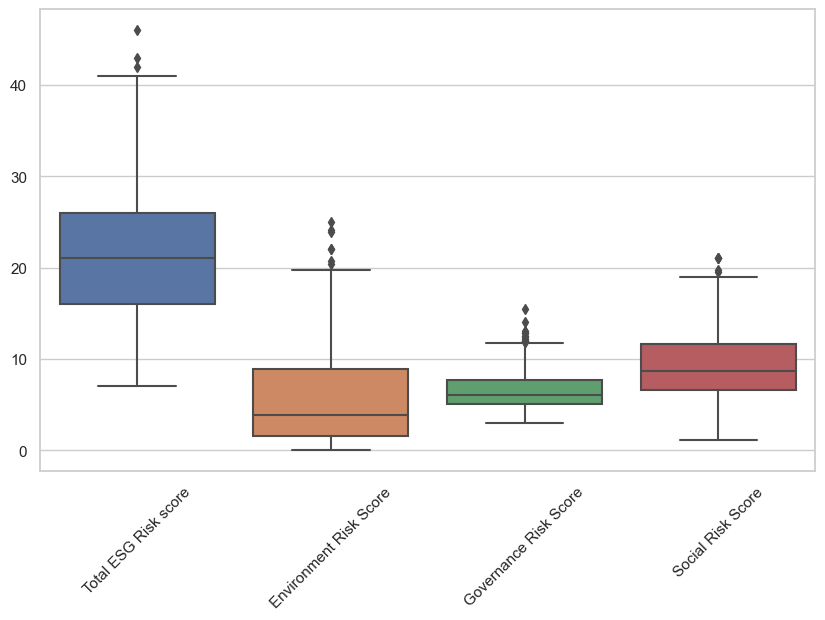

In [71]:
# Visualize the distribution of numerical columns
num_cols = ['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()



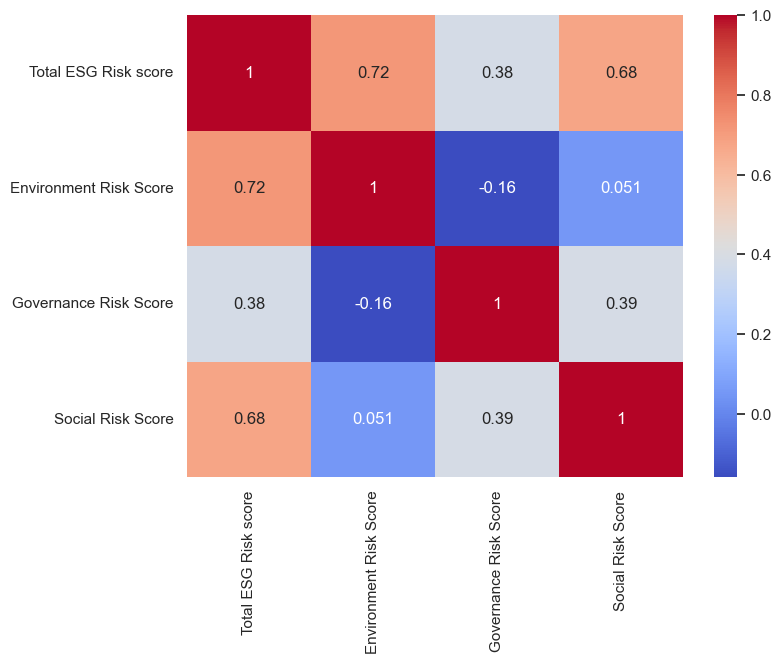

In [47]:
# Correlation heatmap
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

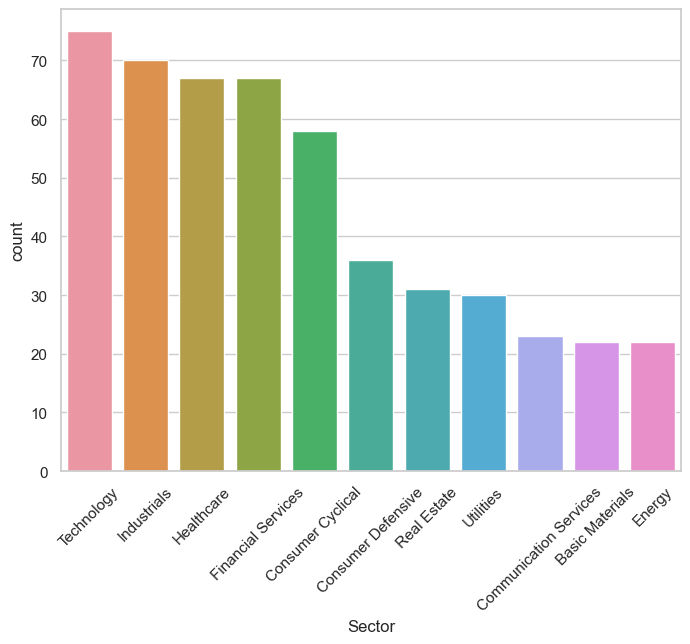

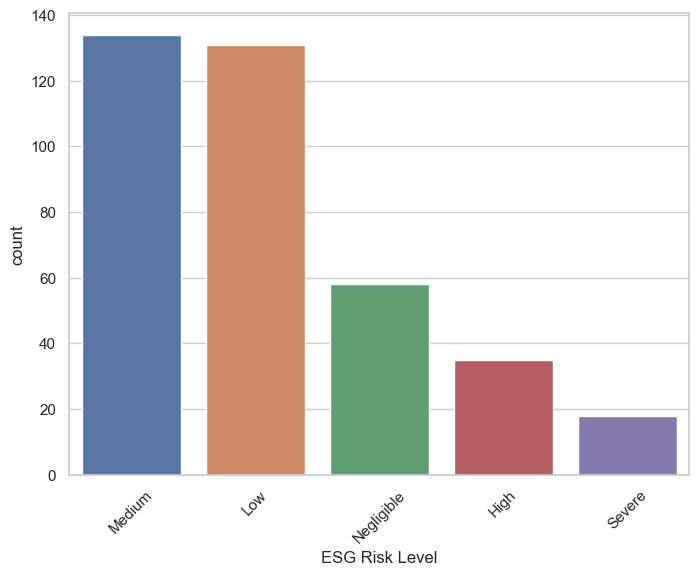

In [73]:
# Visualize categorical variables
cat_cols = ['Sector', 'ESG Risk Level']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()



c:\Users\Mohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


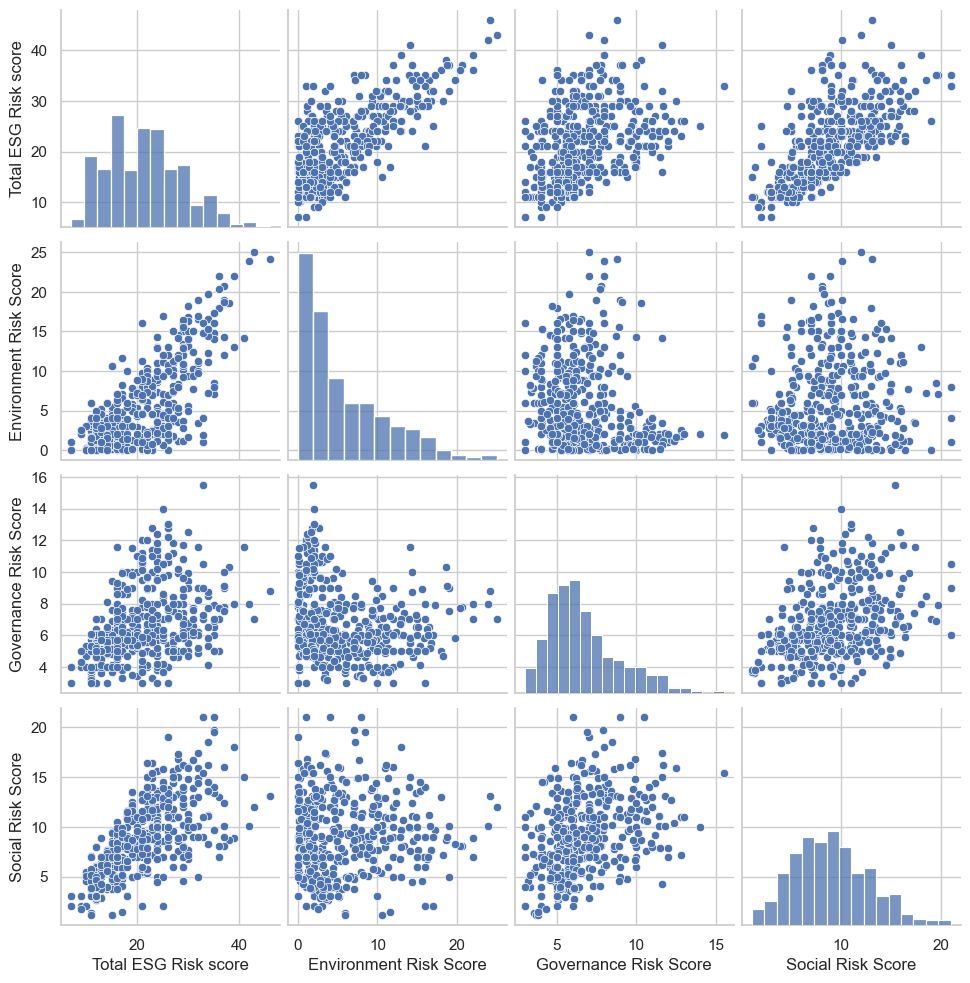

In [52]:
# Pairplot for numerical variables
sns.pairplot(df[num_cols])
plt.show()

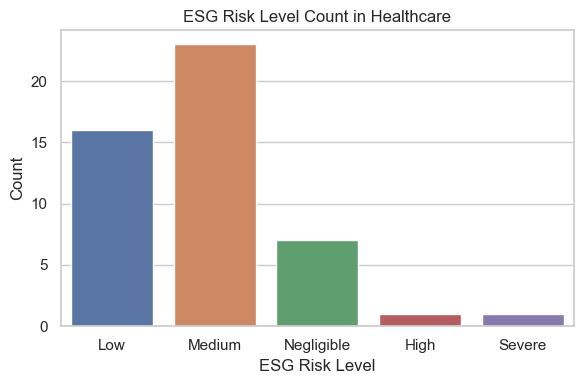

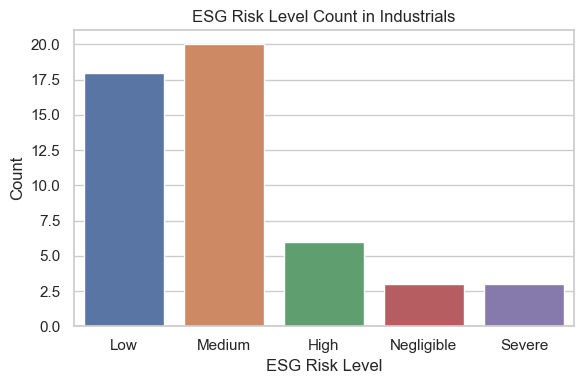

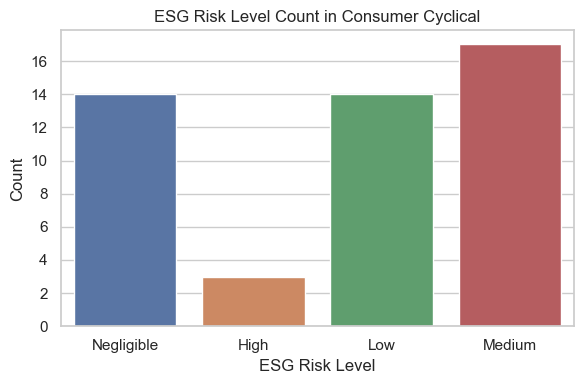

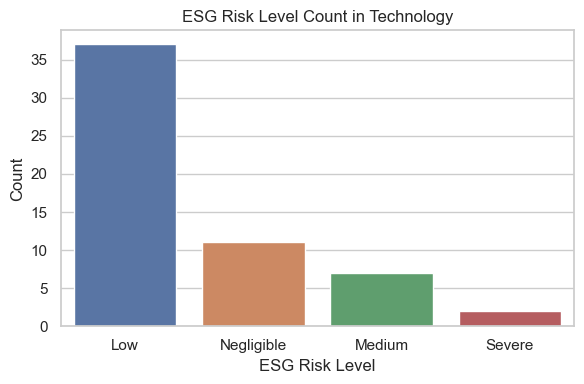

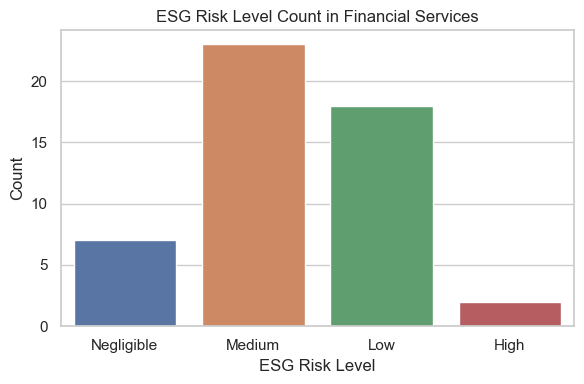

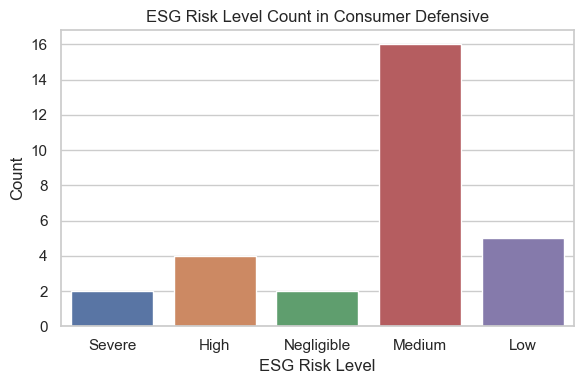

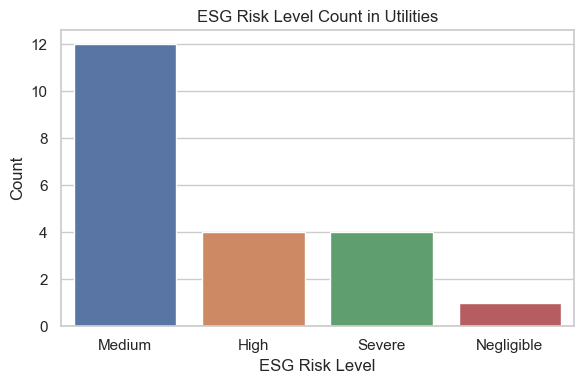

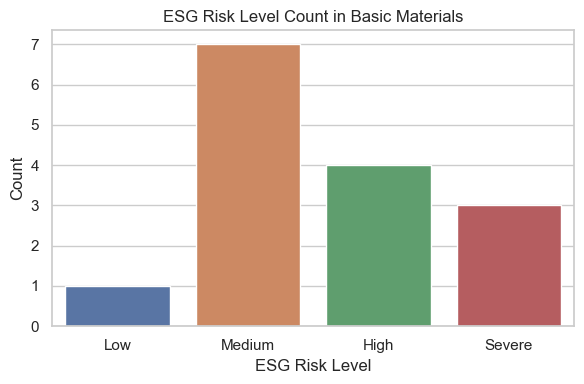

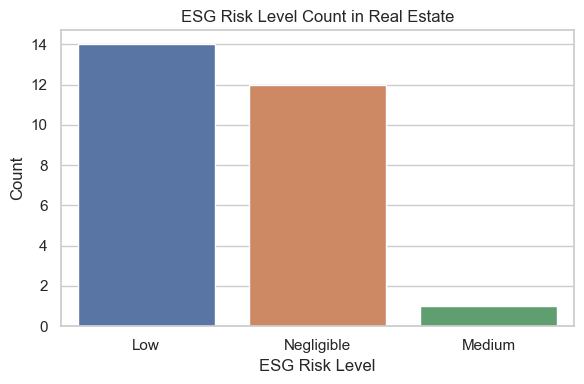

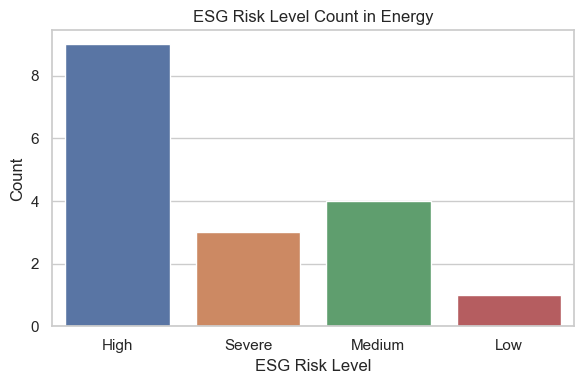

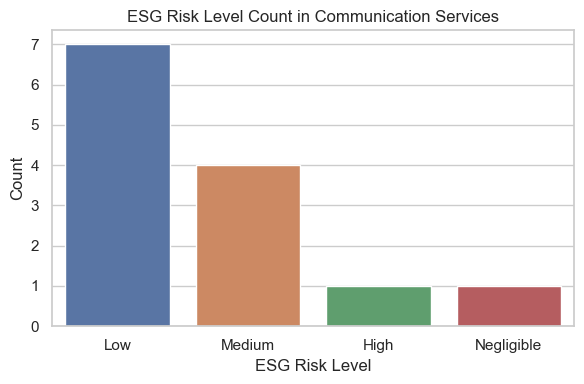

ValueError: min() arg is an empty sequence

<Figure size 600x400 with 0 Axes>

In [74]:
# Get unique sectors
sectors = df['Sector'].unique()

# Loop through each sector and create a count plot
for sector in sectors:
    sector_df = df[df['Sector'] == sector]
    
    plt.figure(figsize=(6, 4))
    sns.countplot(data=sector_df, x='ESG Risk Level')
    plt.title(f'ESG Risk Level Count in {sector}')
    plt.xlabel('ESG Risk Level')
    plt.ylabel('Count')
    plt.tight_layout()
    
    plt.show()

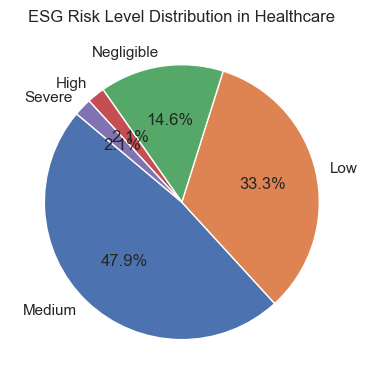

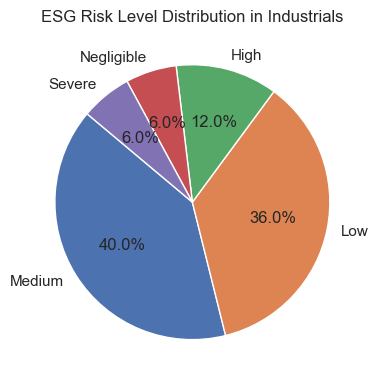

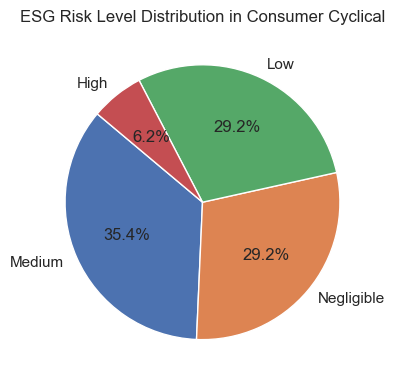

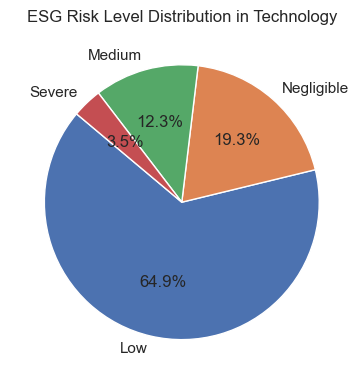

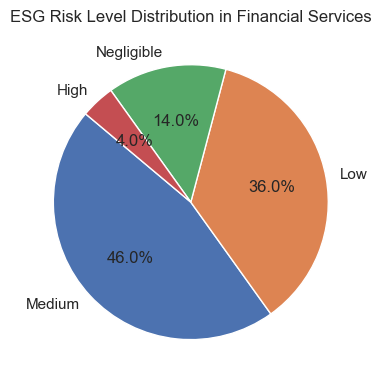

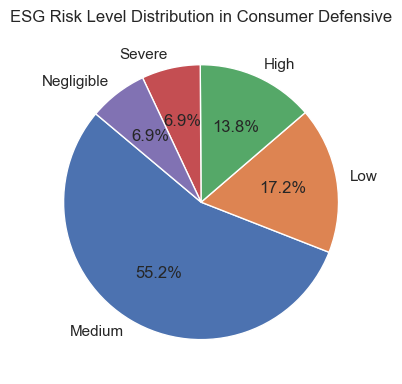

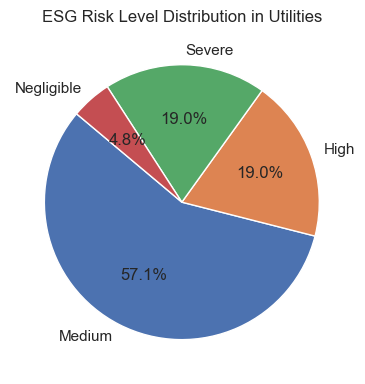

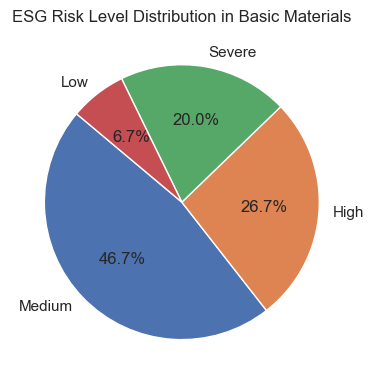

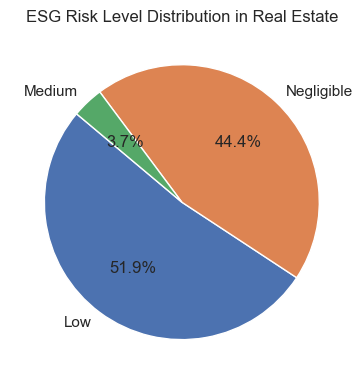

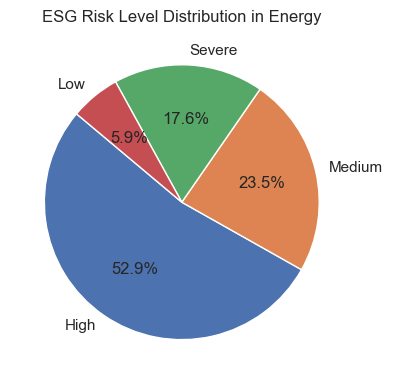

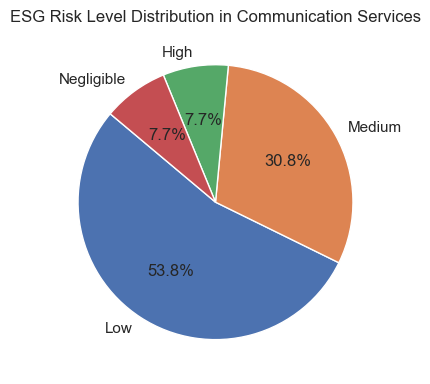

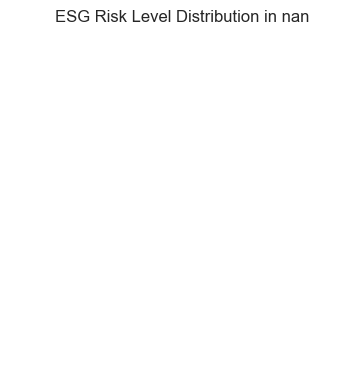

In [75]:
# Loop through each sector and create a pie chart
for sector in sectors:
    sector_df = df[df['Sector'] == sector]
    risk_counts = sector_df['ESG Risk Level'].value_counts()
    
    plt.figure(figsize=(6, 4))
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'ESG Risk Level Distribution in {sector}')
    plt.tight_layout()
    
    plt.show()